<h2 style="text-align: center;"><b>Нейронная сеть из одного нейрона</b></h3>

---

<h3 style="text-align: center;"><b>Компоненты нейросети</b></h3>

Принципиальную роль в построении любой ***нейронной сети*** играют следующие вещи:

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количество итераций обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

Всё вышеперечисленное мы задаём *руками*, самостоятельно.

То, что связано с ***данными и задачей*** также имеет существенное влияние:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

<h3 style="text-align: center;"><b>Один нейрон на Keras</b></h3>

В качестве примера возьмём простой набор данных для классификации -- датасет "яблоки и груши":

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("apples_pears.csv")

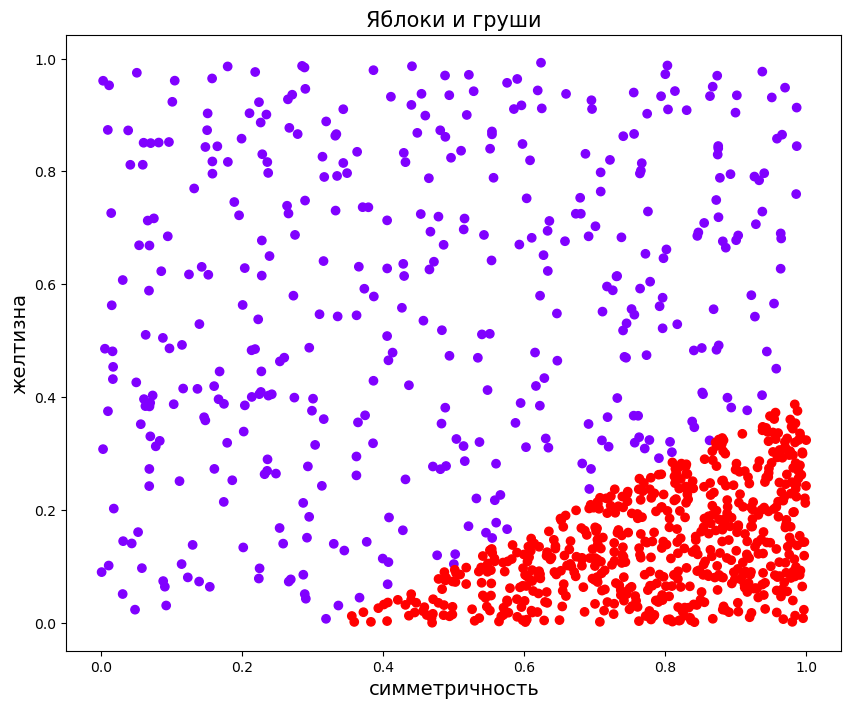

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

In [ ]:
X = data.iloc[:,:2].values  # матрица объекты-признаки
y = data['target'].values.reshape((-1, 1))  # классы (столбец из нулей и единиц)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import sigmoid

In [ ]:
X[:,:10]

array([[0.77942731, 0.25730527],
       [0.77700501, 0.0159154 ],
       [0.97709225, 0.30420962],
       ...,
       [0.92721921, 0.13498618],
       [0.01582991, 0.48132194],
       [0.96796389, 0.30857107]])

In [ ]:
num_features = X.shape[1]

neuron = Sequential()
neuron.add(Dense(1, input_shape=(num_features,), activation=sigmoid))

In [ ]:
neuron

Пока что мы просто создали объект класса `Sequential`, который состоит из одного линейного входного слоя размерности (num_features, 1) и 1 нейрона с сигмоидой в качестве активационной функции. Но уже сейчас его можно применить к объекту (тензору), просто веса в начале инициализирутся случайно и при forward_pass'е мы получим какой-то ответ пока что необученного нейрона:

In [ ]:
neuron.predict([[1,1]])

array([[0.2469808]], dtype=float32)

Выполним предсказания по всем данным с помощью ещё не обученного нейрона:

[[False]
 [False]
 [False]
 [False]
 [False]]


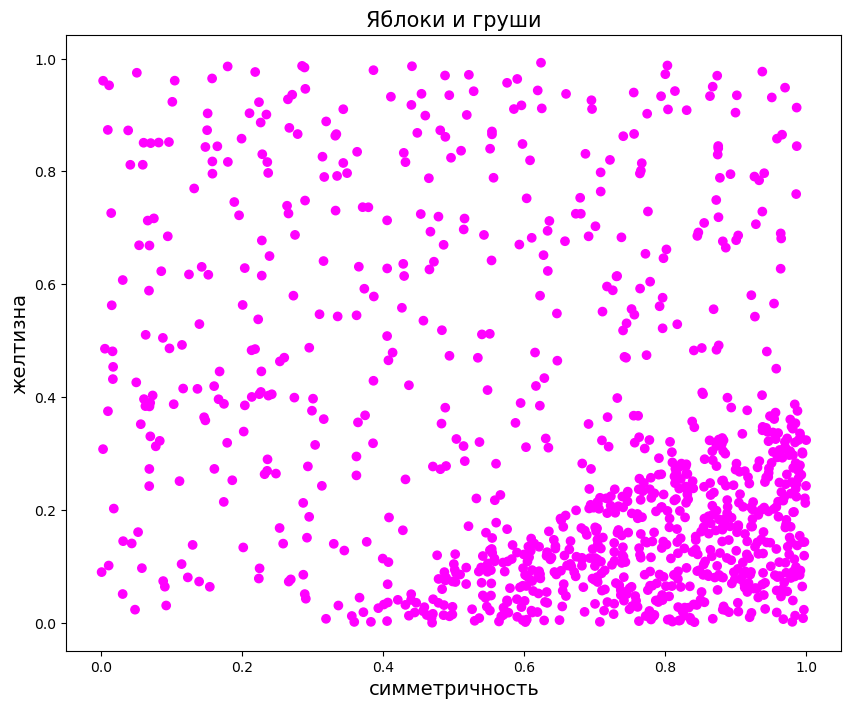

In [ ]:
proba_pred = neuron.predict(X)
y_pred = proba_pred > 0.5
print(y_pred[:5])
y_pred = y_pred.reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

Как и ожидалось, ошибка существенная, по сути, модель не умеет различать классы. Давайте научим нейрон отличать груши от яблок по их симметричности и желтизне!

## Код обучения одного нейрона на Keras:

Обучим нейрон с использованием метода SGD (стохастический градиентный спуск).
Нам понадобится пакет Keras.optimizers, который содержит различные алгоритмы оптимизации.

Зададим параметры:
- затухание весов 1e-6
- момент 0.9
- включим поддержку ускоренного градиента Нестерова (http://proceedings.mlr.press/v28/sutskever13.pdf)
- шаг обучения установим равным 0.1

Не забываем накапливать историю обучения - понадобится для построения графиков

In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers
sgd = optimizers.SGD(decay=1e-6, momentum=0.9, nesterov=True, learning_rate=0.01)
neuron.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
history=neuron.fit(X, y, epochs=100, batch_size=25, verbose=1, validation_split=0.2)

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 0.2433 - accuracy: 0.4588 - val_loss: 0.2222 - val_accuracy: 0.6950
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2095 - accuracy: 0.8438 - val_loss: 0.1989 - val_accuracy: 0.8500
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1930 - accuracy: 0.8150 - val_loss: 0.1876 - val_accuracy: 0.8100
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1835 - accuracy: 0.8062 - val_loss: 0.1787 - val_accuracy: 0.8100
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1757 - accuracy: 0.8125 - val_loss: 0.1711 - val_accuracy: 0.8250
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1689 - accuracy: 0.8175 - val_loss: 0.1640 - val_accuracy: 0.8300
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1626 - accuracy: 0.8438 - val_loss: 0.1577 - val_accuracy: 0.8500
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0744 - accuracy: 0.9287 - val_loss: 0.0682 - val_accuracy: 0.9500
Epoch 60/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0739 - accuracy: 0.9312 - val_loss: 0.0677 - val_accuracy: 0.9500
Epoch 61/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0734 - accuracy: 0.9312 - val_loss: 0.0672 - val_accuracy: 0.9500
Epoch 62/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0730 - accuracy: 0.9312 - val_loss: 0.0667 - val_accuracy: 0.9500
Epoch 63/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0725 - accuracy: 0.9312 - val_loss: 0.0663 - val_accuracy: 0.9500
Epoch 64/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0720 - accuracy: 0.9312 - val_loss: 0.0658 - val_accuracy: 0.9500
Epoch 65/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0716 - accuracy: 0.9325 - val_loss: 0.0654 - val_accuracy: 0.9500
Epoch 

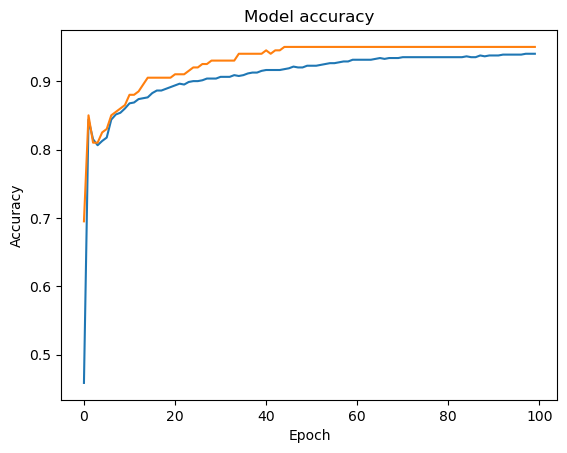

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['train','test'])
plt.show()




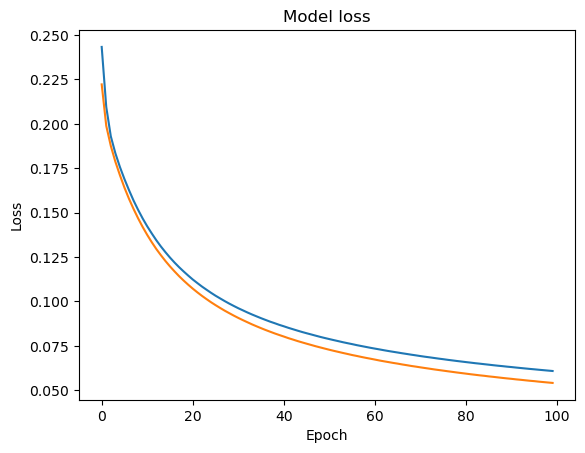

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Обучили. Снова выполним предсказания, но уже с помощью обученной модели.

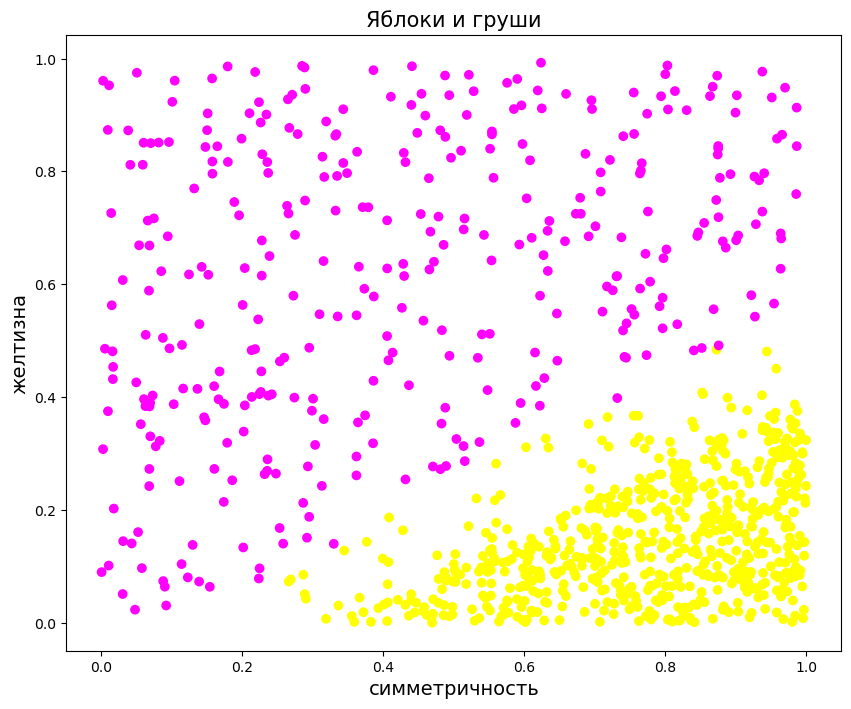

In [ ]:
proba_pred = neuron.predict(X)
y_pred = proba_pred > 0.5
y_pred = y_pred.reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

<h2 style="text-align: center;"><b>Многослойная сеть на Keras</b></h3>

---

## Многослойная нейронная сеть

Как можно понять из названия, многослойная нейросеть состоит из нескольких **слоёв**. Ещё такую многослойную нейросеть, у которой каждый нейрон на предыдущем уровне соединён с нейроном на следующем уровне, называют ***Fully-Connected-сетью*** (или ***Dense-сетью***).  

Расмотрим их устройство более подробно:

* Вот так выглядит двухслойная нейросеть (первый слой - input layer - не считается, потому что это, по сути, не слой):

<img src="http://cs231n.github.io/assets/nn1/neural_net.jpeg" width=300, height=200>

* Так выглядит трёхслойная нейросеть:

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" width=400, height=300>

.. и так далее для большего случая слоёв.

**Обратите внимание:** связи есть от каждого нейрона слоя $L_{i-1}$ к каждому нейрону слоя $L_{i}$, но между нейронами в одном слое связей **нет**.

**Входной слой** -- это данные (матрица $(n, m)$).

Слои, которые не являются входными или выходными, называются **скрытыми слоями (hidden layers)**.

При решении ***задачи регрессии*** в **выходном слое** есть только один нейрон, который возвращает предсказанные числа (для каждого объекта по числу).  

В случае решения ***задачи классификации*** в **выходном слое** может быть как один, так и несколько нейронов. Если решается задача бинарной классификации, то слой содержит один нейрон и $K$ нейронов, если решается задача $K$-класовой классификации.

#### Прямое распространение

Каждый слой многослойной нейросети - это матрица весов, столбцы которой -- это нейроны (один столбец - один нейрон). То есть один столбец -- это веса одного нейрона.

Допустим, мы решаем задачу $K$-классовой классификации (на последнем слое $K$ нейронов). Рассмотрим, как в таком случае выглядит `forward_pass` нейросети:

* Вход: $$X =
\left(
\begin{matrix}
x_{11} & ... & x_{1M} \\
... & \ddots  & ...\\
x_{N1} & ... & x_{NM}
\end{matrix}
\right)
$$

-- матрица $(N, M)$

* Структура сети - много слоёв, в слоях много нейронов. Первый слой (после входного) выглядит так:

$$ W^1 =
\left(
\begin{matrix}
w_{11} & ... & w_{1L_1} \\
... & \ddots  & ...\\
w_{M1} & ... & w_{ML_1}
\end{matrix}
\right)
$$

-- матрица $(M, L_1)$

То есть это в точности $L_1$ нейронов, каждый имеет свои собственные веса, их $M$ штук.

Мы помним, что нейрон - это линейное преобразование и потом нелинейная функция активации от этого преобразования. Однако в многослойных нейростеях часто отделяют `Linear` часть и `Activation`, то есть слоем считаем набор весов нейронов, а следующий слой всегда функция активации (у всех нейронов из слоя она одна и та же, обычно фреймворки не позволяют задавать конкретному нейрону в слое отличную от других нейронов в этом слое функцию активации, однако это легко сделать, объявив слой из одного нейрона).

* Другие слои выглядит точно так же, как первый слой. Например, второй слой будет такой:

$$ W^2 =
\left(
\begin{matrix}
w_{11} & ... & w_{1L_2} \\
... & \ddots  & ...\\
w_{L_11} & ... & w_{L_1L_2}
\end{matrix}
\right)
$$

-- матрица $(L_1, L_2)$

То есть это в точности $L_2$ нейронов, каждый имеет свои собственные веса, их $L_1$ штук.

* Выходной слой:  

Пусть в нейросети до выходного слоя идут $t$ слоёв. Тогда выходной слой имеет форму:

$$ W^{out} =
\left(
\begin{matrix}
w_{11} & ... & w_{1K} \\
... & \ddots  & ...\\
w_{L_t1} & ... & w_{L_tK}
\end{matrix}
\right)
$$

-- матрица $(L_t, K)$, где $L_t$ - количество нейронов в $t$-ом слое, а $K$ -- количество классов.

В итоге *для `forward_pass` нам нужно просто последовтельно перемножить матрицы друг за другом, применяя после каждого умножения соответсвующую функцию активации*.

*Примечание*: можно думать об умножении на очередную матрицу весов как на переход в **новое признаковое пространство**. Действительно, когда подаём матрицу $X$ и умножаем на матрицу первого слоя, мы получаем матрицу размера $(N, L_1)$, то есть как будто $L_1$ "новых" признаков (построенных как линейная комбинация старых до применения функции активации, и уже как нелинейная комбинация после активации). Здесь уместно вспомнить, что Deep Learning является пообластью Representation Learning, то есть позволяет выучивает новые представляения данных.

**Обратное распространение**

Обучается с помощью метода "Error Backpropagation" - ["Обратное распространение ошибки"](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BE%D1%88%D0%B8%D0%B1%D0%BA%D0%B8), принцип распространения очень похож на то, как мы обучали один нейрон - это градиентный спуск, но по "всей нейросети" сразу.  

Backpropagation работает корректно благодаря ***chain rule*** (=правилу взятия производной сложной функции):  

Если $f(x) = f(g(x))$, то:  

$$\frac{\partial{f}}{\partial{x}} = \frac{\partial{f}}{\partial{g}} \frac{\partial{g}}{\partial{x}}$$

Более подробно про backpropagation можно прочитать здесь (на английском):  https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

# Создание двухслойной нейросети
Cоздадим двухслойную нейросеть из 100 нейронов:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import keras

Генерация датасета:

In [ ]:
N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

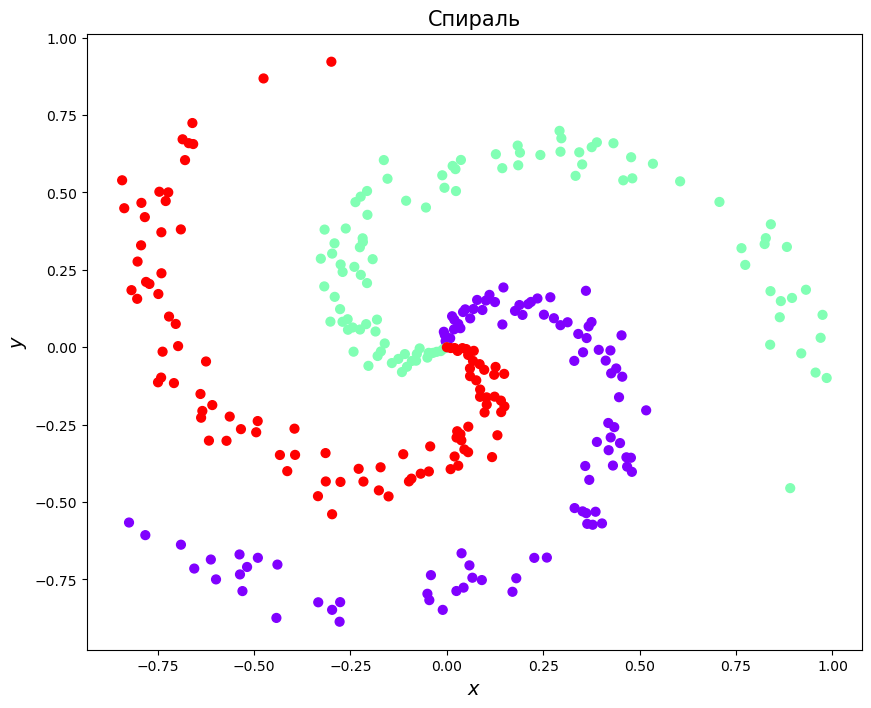

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)
plt.title('Спираль', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

In [ ]:
print(X.data.shape, y.data.shape)

(300, 2) (300,)


In [ ]:
from keras.utils import np_utils
y = keras.utils.np_utils.to_categorical(y, 3)


In [ ]:
from keras import optimizers
two_layer_net=keras.models.Sequential()
two_layer_net.add(keras.layers.Dense(100, input_shape=(X.shape[1],), activation='relu'))
two_layer_net.add(keras.layers.Dense(3, activation='softmax'))
print(two_layer_net.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________
None


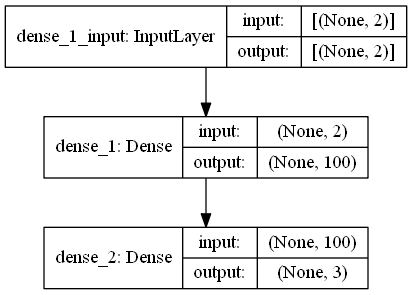

In [ ]:
#визуализация модели
from keras.utils.vis_utils import plot_model
plot_model(two_layer_net, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras import optimizers
sgd = optimizers.SGD(decay=1e-6, momentum=0.9, nesterov=True, learning_rate=0.01)
two_layer_net.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history=two_layer_net.fit(X, y, epochs=150, batch_size=64, verbose=1, validation_split=0.2)


Epoch 1/150
4/4 [==============================] - 1s 67ms/step - loss: 1.0756 - accuracy: 0.4542 - val_loss: 1.1659 - val_accuracy: 0.0000e+00
Epoch 2/150
4/4 [==============================] - 0s 19ms/step - loss: 1.0593 - accuracy: 0.5292 - val_loss: 1.2127 - val_accuracy: 0.0000e+00
Epoch 3/150
4/4 [==============================] - 0s 15ms/step - loss: 1.0354 - accuracy: 0.5875 - val_loss: 1.2690 - val_accuracy: 0.0000e+00
Epoch 4/150
4/4 [==============================] - 0s 18ms/step - loss: 1.0100 - accuracy: 0.6208 - val_loss: 1.3307 - val_accuracy: 0.0000e+00
Epoch 5/150
4/4 [==============================] - 0s 14ms/step - loss: 0.9843 - accuracy: 0.6250 - val_loss: 1.3917 - val_accuracy: 0.0000e+00
Epoch 6/150
4/4 [==============================] - 0s 22ms/step - loss: 0.9621 - accuracy: 0.6208 - val_loss: 1.4520 - val_accuracy: 0.0000e+00
Epoch 7/150
4/4 [==============================] - 0s 19ms/step - loss: 0.9411 - accuracy: 0.6083 - val_loss: 1.5066 - val_accuracy: 0.0

4/4 [==============================] - 0s 16ms/step - loss: 0.5692 - accuracy: 0.6667 - val_loss: 3.2604 - val_accuracy: 0.0000e+00
Epoch 114/150
4/4 [==============================] - 0s 15ms/step - loss: 0.5671 - accuracy: 0.6583 - val_loss: 3.2757 - val_accuracy: 0.0000e+00
Epoch 115/150
4/4 [==============================] - 0s 16ms/step - loss: 0.5655 - accuracy: 0.6667 - val_loss: 3.2880 - val_accuracy: 0.0000e+00
Epoch 116/150
4/4 [==============================] - 0s 14ms/step - loss: 0.5635 - accuracy: 0.6625 - val_loss: 3.2948 - val_accuracy: 0.0000e+00
Epoch 117/150
4/4 [==============================] - 0s 14ms/step - loss: 0.5619 - accuracy: 0.6583 - val_loss: 3.3068 - val_accuracy: 0.0000e+00
Epoch 118/150
4/4 [==============================] - 0s 16ms/step - loss: 0.5602 - accuracy: 0.6583 - val_loss: 3.3248 - val_accuracy: 0.0000e+00
Epoch 119/150
4/4 [==============================] - 0s 15ms/step - loss: 0.5583 - accuracy: 0.6667 - val_loss: 3.3505 - val_accuracy: 0.0

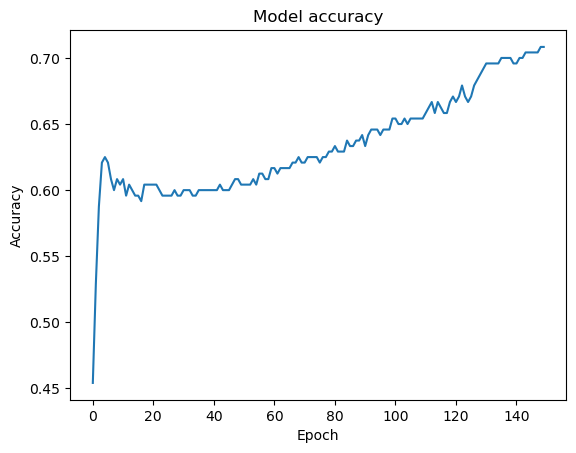

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['train','test'])
plt.show()

# Создание многослойной нейросети
Усложним архитектуру нейронной сети прямого распространения:

In [ ]:
many_layer_net=keras.models.Sequential()
two_layer_net.add(keras.layers.Dense(100, input_shape=(X.shape[1],), activation='relu'))
two_layer_net.add(keras.layers.Dense(100, activation='relu'))

two_layer_net.add(keras.layers.Dense(100, activation='relu'))
two_layer_net.add(keras.layers.Dense(3, activation='softmax'))
sgd = optimizers.SGD(decay=1e-6, momentum=0.9, nesterov=True, learning_rate=0.001)
two_layer_net.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history=two_layer_net.fit(X, y, epochs=150, batch_size=64, verbose=1, validation_split=0.2)


Epoch 1/150
4/4 [==============================] - 1s 89ms/step - loss: 1.1089 - accuracy: 0.4167 - val_loss: 1.1146 - val_accuracy: 0.0000e+00
Epoch 2/150
4/4 [==============================] - 0s 24ms/step - loss: 1.1045 - accuracy: 0.4167 - val_loss: 1.1265 - val_accuracy: 0.0000e+00
Epoch 3/150
4/4 [==============================] - 0s 24ms/step - loss: 1.0976 - accuracy: 0.4167 - val_loss: 1.1411 - val_accuracy: 0.0000e+00
Epoch 4/150
4/4 [==============================] - 0s 30ms/step - loss: 1.0902 - accuracy: 0.4167 - val_loss: 1.1585 - val_accuracy: 0.0000e+00
Epoch 5/150
4/4 [==============================] - 0s 21ms/step - loss: 1.0822 - accuracy: 0.4167 - val_loss: 1.1770 - val_accuracy: 0.0000e+00
Epoch 6/150
4/4 [==============================] - 0s 24ms/step - loss: 1.0733 - accuracy: 0.4167 - val_loss: 1.1954 - val_accuracy: 0.0000e+00
Epoch 7/150
4/4 [==============================] - 0s 23ms/step - loss: 1.0648 - accuracy: 0.4167 - val_loss: 1.2130 - val_accuracy: 0.0

4/4 [==============================] - 0s 16ms/step - loss: 0.6029 - accuracy: 0.7375 - val_loss: 2.7377 - val_accuracy: 0.0000e+00
Epoch 114/150
4/4 [==============================] - 0s 16ms/step - loss: 0.6005 - accuracy: 0.7375 - val_loss: 2.7521 - val_accuracy: 0.0000e+00
Epoch 115/150
4/4 [==============================] - 0s 17ms/step - loss: 0.5983 - accuracy: 0.7375 - val_loss: 2.7654 - val_accuracy: 0.0000e+00
Epoch 116/150
4/4 [==============================] - 0s 16ms/step - loss: 0.5958 - accuracy: 0.7375 - val_loss: 2.7796 - val_accuracy: 0.0000e+00
Epoch 117/150
4/4 [==============================] - 0s 17ms/step - loss: 0.5936 - accuracy: 0.7375 - val_loss: 2.7948 - val_accuracy: 0.0000e+00
Epoch 118/150
4/4 [==============================] - 0s 16ms/step - loss: 0.5913 - accuracy: 0.7375 - val_loss: 2.8121 - val_accuracy: 0.0000e+00
Epoch 119/150
4/4 [==============================] - 0s 16ms/step - loss: 0.5893 - accuracy: 0.7375 - val_loss: 2.8293 - val_accuracy: 0.0

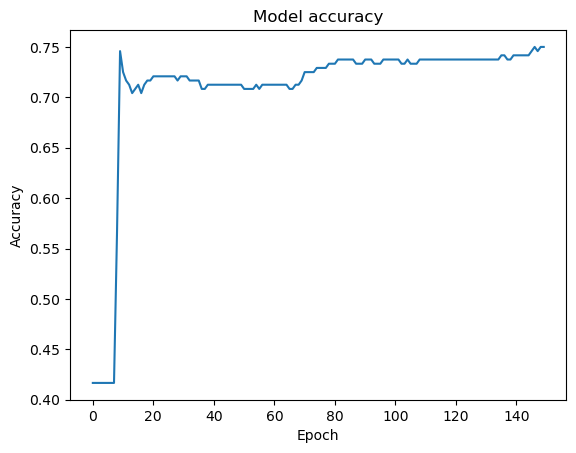

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Создание многослойной нейросети для классификации рукописных цифр

In [ ]:
import keras

from keras.datasets import mnist
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.models import Sequential
from keras.optimizers import adam_v2
from keras.utils import np_utils
from keras.utils import np_utils

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

number_of_classes = 10

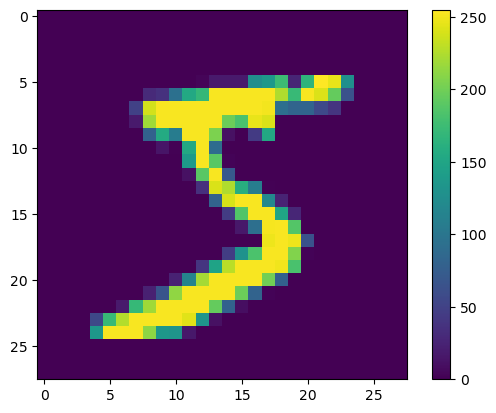

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)


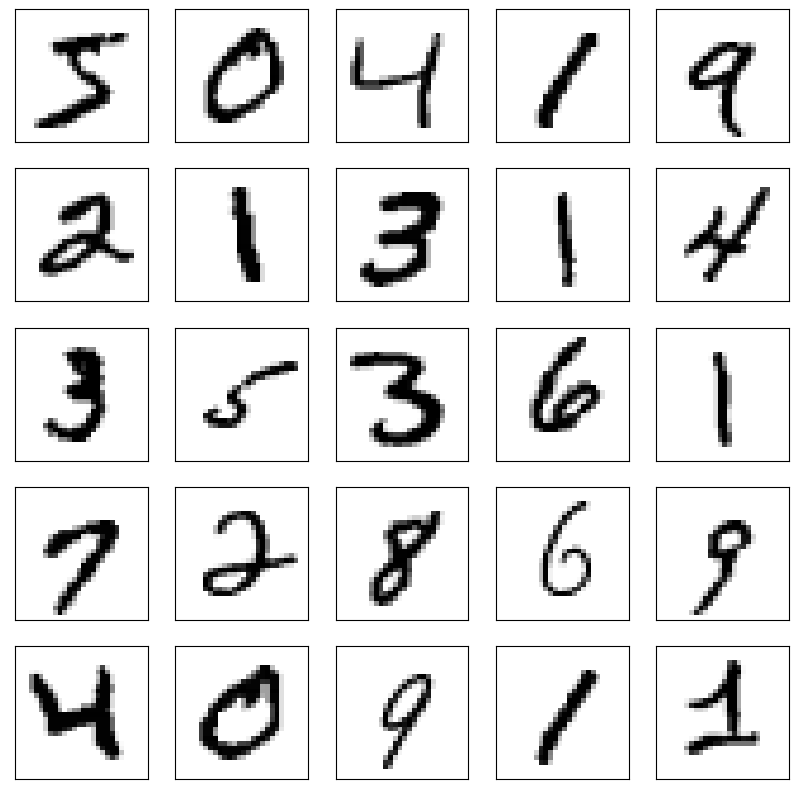

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]).astype('float32')

#для преобразования двумерных данных в одномерные в нейронной сети можно использовать слой Flatten(input_shape=(28,28))

X_train/=255
X_test/=255

y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(512, input_dim=(X_train.shape[1]), activation='relu'))
model.add(keras.layers.Dense(number_of_classes, activation='softmax'))
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=200)


Epoch 1/5
300/300 [==============================] - 3s 8ms/step - loss: 0.3046 - accuracy: 0.9153 - val_loss: 0.1558 - val_accuracy: 0.9543
Epoch 2/5
300/300 [==============================] - 2s 5ms/step - loss: 0.1257 - accuracy: 0.9640 - val_loss: 0.1052 - val_accuracy: 0.9684
Epoch 3/5
300/300 [==============================] - 2s 5ms/step - loss: 0.0832 - accuracy: 0.9764 - val_loss: 0.0862 - val_accuracy: 0.9746
Epoch 4/5
300/300 [==============================] - 2s 8ms/step - loss: 0.0600 - accuracy: 0.9828 - val_loss: 0.0841 - val_accuracy: 0.9731
Epoch 5/5
300/300 [==============================] - 1s 4ms/step - loss: 0.0459 - accuracy: 0.9872 - val_loss: 0.0737 - val_accuracy: 0.9776


In [ ]:
#оценка точности
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 2s 5ms/step - loss: 0.0737 - accuracy: 0.9776
Test accuracy: 0.9775999784469604
Test loss: 0.07374592870473862


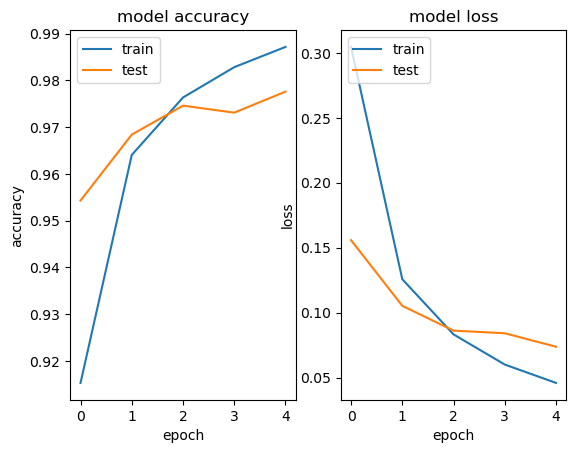

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set(title='model accuracy')
ax1.set(ylabel='accuracy')
ax1.set(xlabel='epoch')
ax1.legend(['train', 'test'], loc='upper left')
ax2 = fig.add_subplot(1,2,2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set(title='model loss')
ax2.set(ylabel='loss')
ax2.set(xlabel='epoch')
ax2.legend(['train', 'test'], loc='upper left')
plt.show()


# Инициализация сети
Важным моментом при конструировании сети является начальная инициализация весов. Удачно выбранный способ инициализации весов может значительно влиять на способность модели к обучению.

Существует различные подходы к начальной инициализации весов.

Например, метод Завьера. Основная идея этого метода — упростить прохождение сигнала через слой во время как прямого, так и обратного распространения ошибки для линейной функции активации (этот метод также хорошо работает для сигмоидной функции, так как участок, где она ненасыщена, также имеет линейный характер). При вычислении весов этот метод опирается на вероятностное распределение.

Метод инициализации Ге (He) — это вариация метода Завьера, больше подходящая функции активации ReLU, компенсирующая тот факт, что эта функция возвращает нуль для половины области определения.

Выделяют также метод ортогональной инициализации.

In [ ]:
model_reg = keras.models.Sequential()
model_reg.add(keras.layers.Dense(512, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='he_uniform'))
model_reg.add(keras.layers.Dense(number_of_classes, activation='softmax', kernel_initializer='glorot_uniform'))

# L2-регуляризация
Одной из основных проблем машинного обучения является проблема переобучения (overfitting), когда модель в погоне за минимизацией затрат на обучение теряет способность к обобщению.

Существует простой способ держать переобучение под контролем — метод dropout.

Но есть и другие регуляризаторы, которые можно применить к сети. Один из них — L_2-регуляризация (также называемая сокращением весов, англ. weight decay), которая использует более прямой подход к регуляризации, чем dropout. Обычно первопричиной переобучения является сложность модели (в смысле количества ее параметров), слишком высокая для решаемой задачи и имеющегося обучающего множества. В некотором смысле, задача регуляризатора — понизить сложность модели, сохранив количество ее параметров.

L_2-регуляризация выполняется посредством наложения штрафов (penalising) на веса с наибольшими значениями, минимизируя их L_2-норму с использованием параметра λ — коэффициент регуляризации, выражающий предпочтение минимизации нормы относительно минимизации потерь на обучающем множестве.

Крайне важно правильно выбрать λ. Если коэффициент слишком мал, то эффект от регуляризации будет ничтожен, если же слишком велик — модель обнулит все веса.

In [ ]:
from keras.regularizers import l2
l2_lambda = 0.0001
model_reg = keras.models.Sequential()
model_reg.add(keras.layers.Dense(512, input_dim=(X_train.shape[1]), activation='relu',kernel_initializer='he_uniform', bias_regularizer=l2(l2_lambda)))
model_reg.add(keras.layers.Dense(number_of_classes, activation='softmax', kernel_initializer='glorot_uniform'))

In [ ]:
model_reg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model_reg.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=200)

Epoch 1/5
300/300 [==============================] - 2s 5ms/step - loss: 0.3011 - accuracy: 0.9140 - val_loss: 0.1499 - val_accuracy: 0.9582
Epoch 2/5
300/300 [==============================] - 1s 4ms/step - loss: 0.1228 - accuracy: 0.9651 - val_loss: 0.1044 - val_accuracy: 0.9692
Epoch 3/5
300/300 [==============================] - 1s 4ms/step - loss: 0.0811 - accuracy: 0.9765 - val_loss: 0.0831 - val_accuracy: 0.9755
Epoch 4/5
300/300 [==============================] - 2s 5ms/step - loss: 0.0590 - accuracy: 0.9831 - val_loss: 0.0795 - val_accuracy: 0.9755
Epoch 5/5
300/300 [==============================] - 1s 4ms/step - loss: 0.0439 - accuracy: 0.9872 - val_loss: 0.0708 - val_accuracy: 0.9783


## Применение обученной нейронной сети
Необходимо нарисовать цифру (например в Paint) или скачать из Интернета

[1.4453518e-11 1.0677580e-11 6.7775865e-04 4.6621627e-01 3.0039981e-24
 3.2977484e-02 8.3165309e-05 5.0001395e-01 3.1352767e-05 6.3720331e-12]


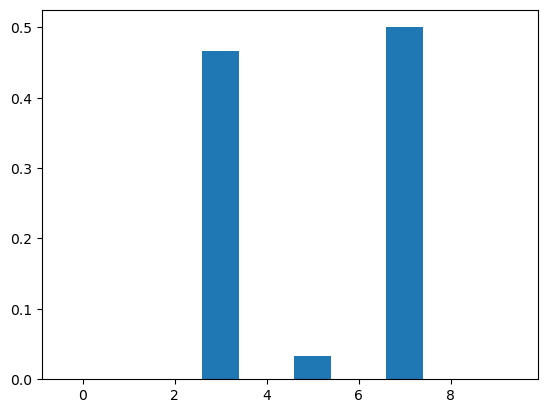

7


In [ ]:
#выполняем преобразование картинки с цифрой
from PIL import Image
#преобразование входного изображения в формат набора MNIS
image=Image.open("cifra-2.png").resize((28,28))
img = np.invert(image.convert('L')).ravel()
im2arr = img.reshape(1, 28* 28).astype('float32')/255
#plt.imshow(image, cmap=plt.cm.binary)
#использование обученной модели
y_pred = model.predict(im2arr)
print(y_pred[0])
plt.bar(range(10), y_pred[0])
plt.show()
print(np.argmax(y_pred))

In [ ]:
#сохранение модели
model.save('model.h5')

#загрузка модели
#model_load=keras.models.load_model('model.h5')

## Задание 1

Для набора данных "Спираль"
1. Попробуйте улучшить результат классификации за счет изменения следующих параметров: скорость обучения, количество эпох, виды оптимизаторов, количество нейронов, количество слоев. Результаты анализа представьте в виде графиков (диаграмм).
2. Добавьте слой (слои) Dropout (model.add(keras.layers.Dropout(0.5))), посмотрите, как изменится результат.
3. Добавьте слой нормализации (keras.layers.BatchNormalization) и оцените его влияние на качество обучения. Сделайте выводы.

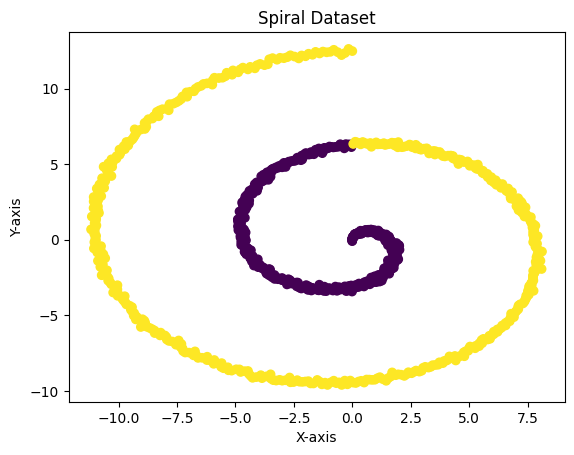

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация спирального набора данных
def make_spiral(n_samples=1000, noise=0.1):
    theta = np.linspace(0, 4 * np.pi, n_samples)
    r = theta + np.random.randn(n_samples) * noise
    x = r * np.sin(theta)
    y = r * np.cos(theta)
    return np.column_stack((x, y)), (theta > 2 * np.pi).astype(int)

# Создание спирального набора данных
X, y = make_spiral()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Spiral Dataset')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD

def create_model(learning_rate=0.001, neurons=32, layers=1, dropout_rate=0.0, use_batch_norm=False):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(2,)))

    if use_batch_norm:
        model.add(BatchNormalization())

    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
        if use_batch_norm:
            model.add(BatchNormalization())

    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [7]:
def train_model(model, X, y, epochs=20, batch_size=32):
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)
    return history


In [8]:
# Параметры для экспериментов
learning_rates = [0.001]  # Используйте только одно значение
neurons_list = [32]       # Используйте только одно значение
layers_list = [2]         # Используйте только одно значение
dropout_rates = [0.0]     # Используйте только одно значение
batch_norm_options = [False]  # Используйте только одно значение


results = {}

for lr in learning_rates:
    for neurons in neurons_list:
        for layers in layers_list:
            for dropout in dropout_rates:
                for batch_norm in batch_norm_options:
                    model = create_model(learning_rate=lr, neurons=neurons, layers=layers, dropout_rate=dropout, use_batch_norm=batch_norm)
                    history = train_model(model, X, y, epochs=100)
                    results[(lr, neurons, layers, dropout, batch_norm)] = history.history['accuracy']


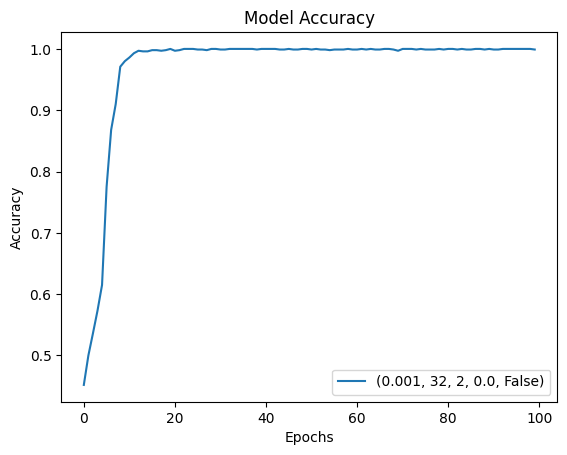

In [9]:
for key, accuracy in results.items():
    plt.plot(accuracy, label=str(key))

plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Задание 2
Для набора данных MNIST
1. Между двух слоев нейронной сети добавить слой Dropout
model.add(keras.layers.Dropout(0.5)), переобучить модель, оценить качество обучения.
Объяснить полученные результаты
2. Добавить еще один скрытый слой и проанализировать его влияние на качество обучения модели.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Загрузка набора данных MNIST
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Преобразование данных
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_test = X_test.reshape((X_test.shape[0], 28 * 28))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
def create_model_with_dropout():
    model = keras.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
    model.add(layers.Dropout(0.5))  # Добавляем слой Dropout
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Создание и обучение модели
model_with_dropout = create_model_with_dropout()
history_with_dropout = model_with_dropout.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7769 - loss: 0.7063 - val_accuracy: 0.9491 - val_loss: 0.1667
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9240 - loss: 0.2473 - val_accuracy: 0.9611 - val_loss: 0.1355
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9371 - loss: 0.2018 - val_accuracy: 0.9674 - val_loss: 0.1131
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9463 - loss: 0.1797 - val_accuracy: 0.9682 - val_loss: 0.1080
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9470 - loss: 0.1672 - val_accuracy: 0.9680 - val_loss: 0.1054
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9535 - loss: 0.1514 - val_accuracy: 0.9703 - val_loss: 0.1001
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9543 - loss: 0.1438 - val_accuracy: 0.9728 - val_loss: 0.0958
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9606 - loss: 0.1302

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9699 - loss: 0.1045
Test accuracy with Dropout: 0.9745


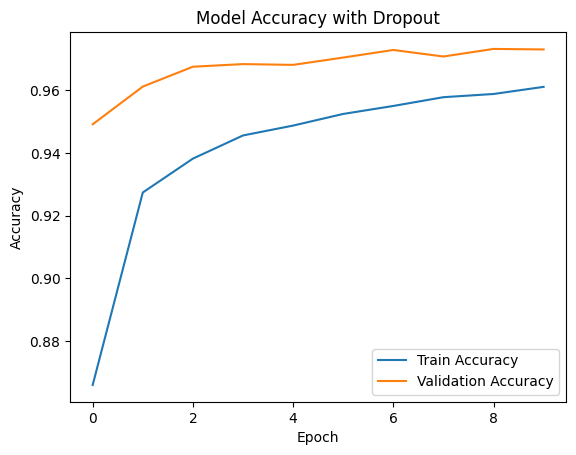

In [12]:
# Оценка модели
test_loss, test_accuracy = model_with_dropout.evaluate(X_test, y_test)
print(f"Test accuracy with Dropout: {test_accuracy:.4f}")

# Визуализация истории обучения
plt.plot(history_with_dropout.history['accuracy'], label='Train Accuracy')
plt.plot(history_with_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [13]:
def create_model_with_additional_layer():
    model = keras.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))  # Новый скрытый слой
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Создание и обучение модели с дополнительным слоем
model_with_additional_layer = create_model_with_additional_layer()
history_with_additional_layer = model_with_additional_layer.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7510 - loss: 0.7662 - val_accuracy: 0.9464 - val_loss: 0.1774
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9221 - loss: 0.2543 - val_accuracy: 0.9548 - val_loss: 0.1505
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9371 - loss: 0.2053 - val_accuracy: 0.9648 - val_loss: 0.1190
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9426 - loss: 0.1855 - val_accuracy: 0.9658 - val_loss: 0.1201
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9463 - loss: 0.1737 - val_accuracy: 0.9693 - val_loss: 0.1035
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9510 - loss: 0.1522 - val_accuracy: 0.9718 - val_loss: 0.0971
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9541 - loss: 0.1461 - val_accuracy: 0.9691 - val_loss: 0.1030
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9559 - loss: 0.1421 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9670 - loss: 0.1085
Test accuracy with additional layer: 0.9724


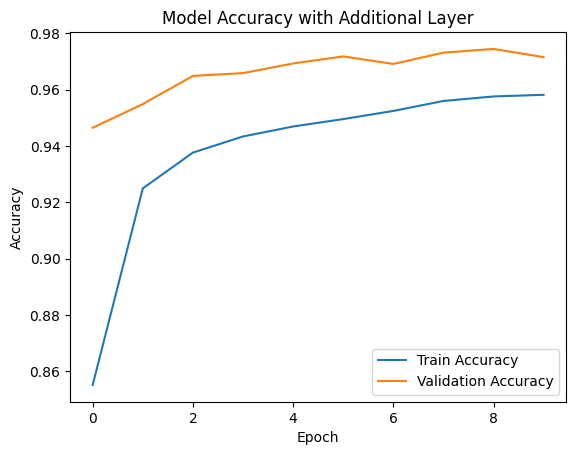

In [14]:
# Оценка модели
test_loss, test_accuracy = model_with_additional_layer.evaluate(X_test, y_test)
print(f"Test accuracy with additional layer: {test_accuracy:.4f}")

# Визуализация истории обучения
plt.plot(history_with_additional_layer.history['accuracy'], label='Train Accuracy')
plt.plot(history_with_additional_layer.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Additional Layer')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Задание 3
1. Создайте модель нейронной сети для решения задачи классификации из Лабораторной работы №5, в соответствии с вариантом задания
1. Обучите модель. В завсимости от результатов, видоизмените модель, чтобы попытаться добиться большей точности


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Загрузка набора данных Iris
iris = load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
def create_model():
    model = keras.Sequential()
    model.add(layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # 3 класса для Iris
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Создание и обучение модели
model = create_model()
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=5)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3206 - loss: 1.2343 - val_accuracy: 0.2500 - val_loss: 1.3291
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5262 - loss: 1.1249 - val_accuracy: 0.3333 - val_loss: 1.2265
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5114 - loss: 1.0780 - val_accuracy: 0.3333 - val_loss: 1.1473
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5413 - loss: 0.9933 - val_accuracy: 0.3333 - val_loss: 1.0715
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5137 - loss: 0.9561 - val_accuracy: 0.4167 - val_loss: 1.0096
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5477 - loss: 0.8904 - val_accuracy: 0.5417 - val_loss: 0.9584
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5353 - loss: 0.8538 - val_accuracy: 0.6667 - val_loss: 0.9134
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6080 - loss: 0.7630 - val_accuracy: 0.7083 - val_loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0603
Test accuracy: 1.0000


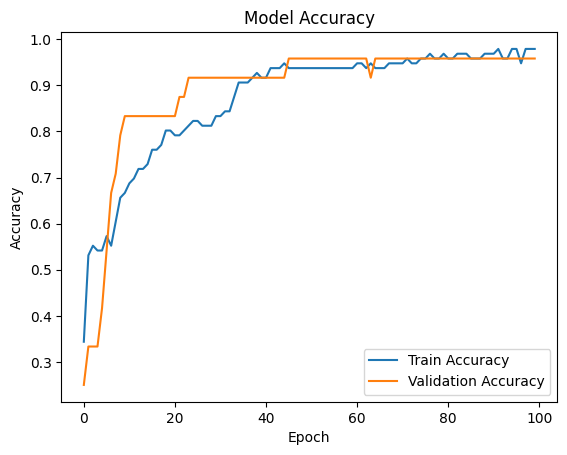

In [17]:
# Оценка модели
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Визуализация истории обучения
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [18]:
def create_model_improved():
    model = keras.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))  # Новый скрытый слой
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [19]:
def create_model_with_dropout():
    model = keras.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dropout(0.5))  # Слой Dropout
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [20]:
# Создание и обучение улучшенной модели
improved_model = create_model_with_dropout()
history_improved = improved_model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=5)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3308 - loss: 1.4050 - val_accuracy: 0.5000 - val_loss: 1.1069
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3269 - loss: 1.2306 - val_accuracy: 0.5417 - val_loss: 0.9975
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3931 - loss: 1.0769 - val_accuracy: 0.5833 - val_loss: 0.9056
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4567 - loss: 0.9890 - val_accuracy: 0.7083 - val_loss: 0.8217
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6908 - loss: 0.8383 - val_accuracy: 0.7917 - val_loss: 0.7380
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7423 - loss: 0.7565 - val_accuracy: 0.8333 - val_loss: 0.6622
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7722 - loss: 0.6651 - val_accuracy: 0.9167 - val_loss: 0.5902
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7729 - loss: 0.5677 - val_accuracy: 0.9167 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0468
Test accuracy of improved model: 1.0000


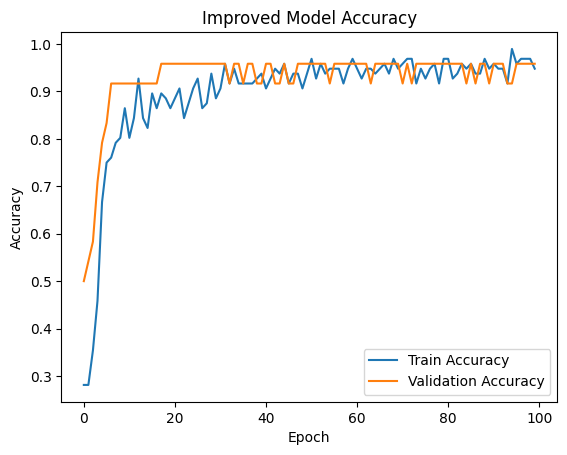

In [21]:
# Оценка улучшенной модели
test_loss, test_accuracy = improved_model.evaluate(X_test, y_test)
print(f"Test accuracy of improved model: {test_accuracy:.4f}")

# Визуализация истории обучения улучшенной модели
plt.plot(history_improved.history['accuracy'], label='Train Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Validation Accuracy')
plt.title('Improved Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
